# First analysis

Code adapted from https://medium.com/analytics-vidhya/exploring-twitter-data-using-python-part-iii-analyzing-the-data-e883aa340dff

In [2]:
import json
import csv
import glob
import pandas as pd
import os
import numpy as np

import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#!unzip dataset.zip 

In [ ]:
pro_words = ["provax", "#provax", "#freevax", "#IoVaccino"]
neg_words = ["#antivax", "novax", "#novax", "noobbligovaccinale", "#libertàdiscelta"]

In [ ]:
'''
    Get all the geolocalized tweets in one dataframe.
    Create a folder called dataset and store all the subfolders with the tweets.
    Then this code will read each subfolder separately and concatenate the csv file with geolocalized tweets.

    Add a label to the tweets we know they are pros or cons; otherwise neutral label is assigned.
'''
path = "dataset/*"
df_geolist = []
for directory in glob.glob(path):
    file = directory + '/allTweets_geo.csv'
    print(file)
    
    #assign a label to each tweet if we know that is pro o contro
    label = "neutral"
    for i in range(len(pro_words)):
        if pro_words[i] in directory:
            label = "pro"
            print(pro_words[i])
    for i in range(len(neg_words)):
        if neg_words[i] in directory:
            label = "con"
            print(neg_words[i])

    frame = pd.read_csv(file)
    frame.columns = ["", "tweet_id", "created_at", "username", "location", "coordinates", "usermentions", "retweet_count", "full_text", "hashtags"]
    frame['opinion'] = label
    df_geolist.append(frame)


dataset\#autismo_#morbillo/allTweets_geo.csv
dataset\#vaccinazioneobbligatoria_#morbillo/allTweets_geo.csv
dataset\#vaccinoMPR_bambini/allTweets_geo.csv
dataset\autismo_#morbillo/allTweets_geo.csv
dataset\epidemia_morbillo/allTweets_geo.csv
dataset\LeggeLorenzin_morbillo/allTweets_geo.csv
dataset\libertà_di_scelta_vaccinale_morbillo/allTweets_geo.csv
dataset\morbillo_#antivax/allTweets_geo.csv
#antivax
dataset\morbillo_#freevax/allTweets_geo.csv
#freevax
dataset\morbillo_#IoVaccino/allTweets_geo.csv
#IoVaccino
dataset\morbillo_#libertàdiscelta/allTweets_geo.csv
#libertàdiscelta
dataset\morbillo_#noobbligovaccinale/allTweets_geo.csv
noobbligovaccinale
dataset\morbillo_#novax/allTweets_geo.csv
novax
#novax
dataset\morbillo_#provax/allTweets_geo.csv
provax
#provax
dataset\morbillo_#vaccini/allTweets_geo.csv
dataset\morbillo_#vacciniobbligatori/allTweets_geo.csv
dataset\morbillo_#vaccino/allTweets_geo.csv
dataset\morbillo_novax/allTweets_geo.csv
novax
dataset\morbillo_provax/allTweets_geo.

In [ ]:
df_geolist = pd.concat(df_geolist, ignore_index=True)
print(f"Number of geolocated tweets : {len(df_geolist)}")

Number of geolocated tweets : 6279


In [ ]:
'''
    Pre-processing tweets' locations. 
    Lowercase letters; remove space; use only the first word in the location.
    Run this cell until the two numbers are the same. (TOSOLVE)
'''
locs_low = df_geolist['location']
locs_low = locs_low.str.lower()
print(len(locs_low))

points = [',', '-', '(', ';', '.','/', '@']
locs = []
for name in locs_low:
    name_wo = name.replace(" ", "")
    if (any(s in name_wo for s in points) == True): 
        for p in points:
            if (p in name_wo) == True:
                name_split = (name_wo.split(p))[0]
                locs.append(name_split)
    else:
        locs.append(name_wo)
print(len(locs))
locs_ser = pd.Series(locs)
df_geolist['location'] = locs_ser

locs_count = locs_ser.value_counts()
locs_count[locs_count>=15]

6279
6279


roma                           616
italia                         496
capod'orlando                  350
milano                         293
firenze                        192
italy                          175
torino                         151
lucca                          121
napoli                         106
rome                            81
milan                           76
bologna                         69
veneto                          58
trieste                         53
lombardia                       52
london                          47
genova                          41
padova                          40
bolzano                         35
verona                          34
pisa                            33
rimini                          33
palermo                         32
modena                          31
montecatini                     30
piemonte                        29
ovunque                         29
primocorno                      29
treviso             

In [ ]:
'''
  Create a map for cities and regions. Add instances to this map if the above output has 
  a location with high number of tweets.

'''
'''
  Create a map for cities and regions. Add instances to this map if the above output has 
  a location with high number of tweets.

'''
mapping = {
    'roma' : 'lazio',
    'romaomaremma' : 'lazio',
    'rome' : 'lazio',
    'romeitaly' : 'lazio',
    'milano' : 'lombardia',
    'milan' : 'lombardia',
    'lecco' : 'lombardia',
    'rho' : 'lombardia',
    'monza' : 'lombardia',
    'pontida' : 'lombardia',
    'bergamo' : 'lombardia',
    'brescia' : 'lombardia',
    'como' : 'lombardia',
    'nerviano' : 'lombardia',
    'mantova' : 'lombardia',
    'lodi' : 'lombardia',
    'pavia' : 'lombardia',
    'trieste' : 'friuli',
    'pordenone' : 'friuli',
    'monfalcone' : 'friuli',
    'udine' : 'friuli',
    'catania' : 'sicilia',
    'palermo' : 'sicilia',
    "capod'orlando" : 'sicilia',
    'messina' : 'sicilia',
    'ragusa' : 'sicilia',
    'cagliari' : 'sardegna',
    'sardinia' : 'sardegna',
    'lucca' : 'toscana',
    'viareggio' : 'toscana',
    'montecatini' : 'toscana',
    'firenze' : 'toscana',
    'borgoamozzano' : 'toscana',
    'firenzequartiere' : 'toscana',
    'firenzequartiere3' : 'toscana',
    'carrara' : 'toscana',
    'fiesole' : 'toscana',
    'prato' : 'toscana',
    'florence' : 'toscana',
    'pisa' : 'toscana',
    'siena' : 'toscana',
    'empoli' : 'toscana',
    'livorno' : 'toscana',
    'grosseto' : 'toscana',
    'arezzo' : 'toscana',
    'genova' : 'liguria',
    'ventimiglia' : 'liguria',
    'rapallo' : 'liguria',
    'napoli' : 'campania',
    'nápoles' : 'campania',
    'positano' : 'campania',
    'caserta' : 'campania',
    'benevento' : 'campania',
    'catanzaro' : 'calabria',
    'cosenza' : 'calabria',
    'crotone' : 'calabria',
    'reggiocalabria' : 'calabria',
    'vibovalentia' : 'calabria',
    'catanzaro' : 'calabria',
    'torino' : 'piemonte',
    'turin' : 'piemonte',
    'pinerolo' : 'piemonte',
    'piedmont' : 'piemonte',
    'asti' : 'piemonte',
    'alessandria' : 'piemonte',
    'padova' : 'veneto',
    'verona' : 'veneto',
    'treviso' : 'veneto',
    'chioggia' : 'veneto',
    'vicenza' : 'veneto',
    'belluno' : 'veneto',
    'venice' : 'veneto',
    'rovigo' : 'veneto',
    'venezia' : 'veneto',
    'valdagno' : 'veneto',
    'bologna' : 'emiliaromagna',
    'modena' : 'emiliaromagna',
    'piacenza' : 'emiliaromagna',
    'parma' : 'emiliaromagna',
    'rimini' : 'emiliaromagna',
    'faenza' : 'emiliaromagna',
    'ravenna' : 'emiliaromagna',
    'ferrara' : 'emiliaromagna', 
    'reggioemilia' : 'emiliaromagna',
    'terni' : 'umbria',
    'perugia' : 'umbria',
    'ancona' : 'marche',
    'pesaro' : 'marche',
    'acquila' : 'abruzzo',
    'teramo' : 'abruzzo',
    'abruzzese' : 'abruzzo',
    'pescara' : 'abruzzo',
    'bolzano' : 'trentino',
    'trento' : 'trentino',
    'bari' : 'puglia',
    'lecce' : 'puglia',
    'taranto' : 'puglia',
    'aosta' : "valled'aosta",
    'courmayeur' : "valled'aosta",
}

In [ ]:
'''
  Apply the map to the df_geolist datafarame and extract the values of the locations.
'''

df_geolist['location'] =  df_geolist['location'].apply(lambda x: mapping[x] if x in mapping.keys() else x )
locs = df_geolist['location'].value_counts()

In [ ]:
'''
    Consider only Italian tweets with a location corresponding to a region 
    and create a dataframe.
'''
regions = ["valled'aosta", 'piemonte', 'liguria', 'lombardia', 'trentino', 'veneto', 
          'friuli', 'emiliaromagna', 'toscana', 'umbria', 'marche', 'lazio',
          'abruzzo', 'molise', 'campania', 'puglia', 'basilicata', 'calabria','sicilia', 'sardegna']

df_italianTweets = pd.DataFrame(df_geolist)
df_italianTweets = df_italianTweets.loc[df_geolist['location'].isin(regions)]

In [ ]:
# Save df_italianTweets
path_italianTweets = "italianTweets.csv"
df_italianTweets.to_csv(path_italianTweets,header=True)

print(f"Number of geolocated tweets : {len(df_italianTweets)}")

Number of geolocated tweets : 3420


In [ ]:
# Upload the italianTweets dataset
df_italianTweets = pd.read_csv("italianTweets.csv")

In [ ]:
'''
  Clean df_italianTweets from the useless columns.
'''
df_italianTweets.drop('coordinates',axis=1, inplace=True)
df_italianTweets.drop('Unnamed: 0',axis=1, inplace=True)
df_italianTweets.drop('Unnamed: 1',axis=1, inplace=True)
df_italianTweets.dropna(axis=0, inplace=True)

# Sentiment Analysis

In [ ]:
import re

In [ ]:
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    # Remove emojis
    txt = txt.encode('ascii', 'ignore').decode('ascii') 
    # Remove newlines
    txt = re.sub("\n", " ", txt)      
    # Remove extra spaces
    txt = re.sub(' +', ' ', txt)   
    #Set lower case
    txt = txt.lower()
    return txt

In [ ]:
#clean the tweets to peforma correct sentiment analysis
df_italianTweets['full_text'] = df_italianTweets['full_text'].apply(cleanUpTweet)

In [ ]:
# Install this before running the next code: 
# python -m spacy download it_core_news_lg



---

---




Solo su Colab

In [ ]:
!unzip sentita.zip # RUNNARE SOLO UNA VOLTA per colab

unzip:  cannot find or open sentita.zip, sentita.zip.zip or sentita.zip.ZIP.


In [ ]:
!pip install sentita/. # Colab

In [ ]:
!pip install --upgrade spacy # Colab

In [ ]:
!python -m spacy download it_core_news_lg # Colab

In [ ]:
# restart runtime
import spacy
spacy.load('it_core_news_lg')



---

---





In [ ]:
from sentita import calculate_polarity

Apply sentiment analysis only to the tweets that were not classified before in pros or cons.

In [ ]:
sentences = []
rows_idx = []
for index, row in df_italianTweets.iterrows():
    if row['opinion'] == 'neutral':
        sentences.append(row['full_text'])
        rows_idx.append(index)
        
_, polarities = calculate_polarity(sentences)

In [ ]:
print(len(df_italianTweets))
print(len(rows_idx))

In [ ]:
pos = np.empty(len(df_italianTweets))
pos[:] = np.NaN
neg = np.empty(len(df_italianTweets))
neg[:] = np.NaN

for i in range(len(df_italianTweets)):
    if i in rows_idx:
        pos[i] = polarities[rows_idx.index(i)][0]
        neg[i] = polarities[rows_idx.index(i)][1]

In [ ]:
df_italianTweets['pos'] = pos
df_italianTweets['neg']  = neg

In [ ]:
for i, row in df_italianTweets.iterrows():
    if i in rows_idx:
        if (df_italianTweets['pos'][i] > df_italianTweets['neg'][i]):
            if (df_italianTweets['pos'][i] > 0.25):
                df_italianTweets['opinion'][i] = 'pro'
        else:
            if (df_italianTweets['neg'][i] > 0.25):
                df_italianTweets['opinion'][i] = 'con'

In [ ]:
df_italianTweets.head()

,tweet_id,created_at,username,location,usermentions,retweet_count,full_text,hashtags,opinion,pos,neg
0,860610466590142464,Fri May 05 21:41:39 +0000 2017,140327940,emiliaromagna,['DarioBallini'],0,chiss se autismo calato in modo proporzionale...,"['autismo', 'morbillo', 'vaccini']",neutral,0.012192,0.070409
1,867724689698902016,Thu May 25 12:51:02 +0000 2017,556350111,sicilia,['l_gad48'],0,vaccini morbillo autismo graphicnovel forse co...,"['vaccini', 'morbillo', 'autismo', 'graphicnov...",con,0.070326,0.484635
2,867363895920533504,Wed May 24 12:57:22 +0000 2017,1364930161,sicilia,[],1,vaccini morbillo autismo graphicnovel forse co...,"['vaccini', 'morbillo', 'autismo', 'graphicnov...",con,0.070326,0.484635
3,864769213046632448,Wed May 17 09:07:01 +0000 2017,824608965464129537,toscana,['MadheaG'],0,la scienza parla. meglio morbillo oggi che aut...,"['scienza', 'morbillo', 'autismo', 'noobbligov...",neutral,0.128730,0.140054
4,864576616797753345,Tue May 16 20:21:43 +0000 2017,2885743858,toscana,['MadheaG'],0,la scienza parla. meglio morbillo oggi che aut...,"['scienza', 'morbillo', 'autismo', 'noobbligov...",neutral,0.128730,0.140054


In [ ]:
# Save df_italianTweets
path_italianTweets = "italianTweets_sentiment.csv"
df_italianTweets.to_csv(path_italianTweets,header=True)

<BarContainer object of 3 artists>

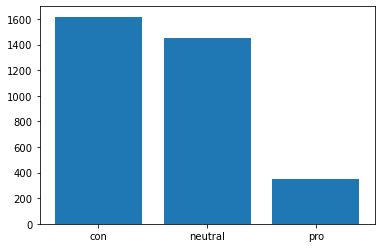

In [ ]:
labels = df_italianTweets.groupby('opinion').count().index.values

values = df_italianTweets.groupby('opinion').size().values

plt.bar(labels, values)

# Coordinates
Find the coordinates to create the final map.


In [ ]:
#pip install geopy

  Using cached geopy-2.1.0-py3-none-any.whl (112 kB)
  Using cached geographiclib-1.50-py3-none-any.whl (38 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='twitter-analysis-cl')
#note that user_agent is a random name
italianLocs = df_italianTweets['location']
italianLocs = list(italianLocs) #keep only the city names

'''
  Make some pre-processing to allow the geolocator to correctly read the locations.
'''
for i in range(len(italianLocs)):
    if italianLocs[i] == "valled'aosta":
        italianLocs[i] = "valle d'aosta"
    if italianLocs[i] == 'emiliaromagna':
        italianLocs[i] = "emilia romagna"

In [ ]:
'''
  To speed up computations compute coordinates for each italian region
'''
for i in range(len(regions)):
    if regions[i] == "valled'aosta":
        regions[i] = "valle d'aosta"
    if regions[i] == 'emiliaromagna':
        regions[i] = "emilia romagna"


coord_regions = []
for i in range (len(regions)):
    geolocated = geolocator.geocode(regions[i])[1]
    coord_regions.append(geolocated)


coordinates = pd.DataFrame(columns=['regions', 'coord'])
coordinates['regions'] = regions
coordinates['coord'] = coord_regions

In [ ]:
geolocated = []
for i in range(len(italianLocs)):
    country = italianLocs[i]
    coords = coord_regions[regions.index(country)]
    geolocated.append([country, coords])

In [ ]:
# Create a panda dataframe
geolocated_df = pd.DataFrame(geolocated)
geolocated_df.columns = ['location','latlong']
geolocated_df['lat'] = geolocated_df.latlong.apply(lambda x: x[0])
geolocated_df['lon'] = geolocated_df.latlong.apply(lambda x: x[1])
geolocated_df.drop('latlong',axis=1, inplace=True)

In [ ]:
# Save the dataframe in a csv file.
path_geolocated = "geolocated.csv"
geolocated_df.to_csv(path_geolocated,header=True)

In [ ]:
# Upload the geolocated dataset
geolocated_df = pd.read_csv("geolocated.csv")
geolocated_df.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
'''
  Add lat and lon to the italianTweets dataframe.
'''
# Group by location.
locations = df_italianTweets.groupby(by=['location']).count()['created_at'].sort_values(ascending=False).to_frame().reset_index()
locations.rename(columns = {'created_at' : 'count'}, inplace = True)

#add coordinates
locations_df = pd.merge(locations, geolocated_df, how='inner', on='location', left_index=True, right_index=True)

In [ ]:
# Save the dataframe in a csv file.
path_locs = "locations.csv"
locations_df.to_csv(path_locs,header=True)

# Map (IN COLAB)
Plot the map: https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

In [3]:
# Upload all the useful dataframe
locations_df = pd.read_csv("locations.csv")
df_italianTweets_sentiment = pd.read_csv("italianTweets_sentiment.csv")

In [4]:
# Compute polarity of each region
locations = df_italianTweets_sentiment.groupby(by=['location', 'opinion']).count()['created_at'].sort_values(ascending=False).to_frame().reset_index()
locations.rename(columns = {'created_at' : 'count'}, inplace = True)

In [5]:
locations

,location,opinion,count
0,lazio,neutral,349
1,lazio,con,327
2,toscana,con,261
3,lombardia,con,242
4,lombardia,neutral,233
5,sicilia,neutral,196
6,toscana,neutral,192
7,sicilia,con,191
8,piemonte,con,112
9,emiliaromagna,con,112


In [6]:
regions = ['piemonte', "valled'aosta", 'lombardia', 'trentino', 'veneto', 
          'friuli', 'liguria', 'emiliaromagna', 'toscana', 'umbria', 'marche', 'lazio',
          'abruzzo', 'molise', 'campania', 'puglia', 'basilicata', 'calabria','sicilia', 'sardegna']

df_opinion = pd.DataFrame(columns = ['location', 'pro', 'con', 'neutral'])

loc = regions
pro = np.zeros(len(regions), dtype = int)
contro = np.zeros(len(regions), dtype = int)
neutro = np.zeros(len(regions), dtype = int)
for i in range(len(locations)):
  row = locations.iloc[i]
  location = row['location']
  idx = loc.index(location)
  opinion = row['opinion']
  if opinion == 'pro':
    pro[idx] = row['count']
  elif opinion == 'con':
    contro[idx] = row['count']
  else:
    neutro[idx] = row['count']

df_opinion['location'] = loc
df_opinion['pro'] = pro
df_opinion['con'] = contro
df_opinion['neutral'] = neutro

In [7]:
df_opinion

,location,pro,con,neutral
0,piemonte,33,112,79
1,valled'aosta,0,3,4
2,lombardia,48,242,233
3,trentino,1,28,22
4,veneto,24,98,92
5,friuli,24,42,23
6,liguria,3,26,23
7,emiliaromagna,19,112,75
8,toscana,61,261,192
9,umbria,2,27,14


In [8]:
merge_coord_opinion = pd.merge(locations_df, df_opinion, how='inner', on='location')
merge_coord_opinion

,Unnamed: 0,location,count,lat,lon,pro,con,neutral
0,0,lazio,724,44.525696,11.039437,48,327,349
1,1,lombardia,523,37.587794,14.155048,48,242,233
2,2,toscana,514,37.587794,14.155048,61,261,192
3,3,sicilia,441,43.458654,11.138920,54,191,196
4,4,piemonte,224,43.458654,11.138920,33,112,79
5,5,veneto,214,43.458654,11.138920,24,98,92
6,6,emiliaromagna,206,45.570369,9.773252,19,112,75
7,7,campania,144,44.525696,11.039437,17,65,62
8,8,friuli,89,43.458654,11.138920,24,42,23
9,9,puglia,54,37.587794,14.155048,4,26,24


##Map 

https://medium.com/@ardito.bryan/creating-a-covid-19-map-of-italy-using-python-1f3182c1fd88

In [9]:
import sys
'geopandas' in sys.modules
!pip install geopandas

     |████████████████████████████████| 972kB 5.5MB/s 
     |████████████████████████████████| 6.5MB 12.3MB/s 
     |████████████████████████████████| 14.8MB 326kB/s 


In [10]:
import sys
import geopandas as gpd
import pandas as pd

In [11]:
!unzip italian-maps-shapefiles.zip

Archive:  italian-maps-shapefiles.zip
   creating: italian-maps-shapefiles/.git/
  inflating: italian-maps-shapefiles/.git/config  
  inflating: italian-maps-shapefiles/.git/description  
 extracting: italian-maps-shapefiles/.git/HEAD  
   creating: italian-maps-shapefiles/.git/hooks/
  inflating: italian-maps-shapefiles/.git/hooks/applypatch-msg.sample  
  inflating: italian-maps-shapefiles/.git/hooks/commit-msg.sample  
  inflating: italian-maps-shapefiles/.git/hooks/fsmonitor-watchman.sample  
  inflating: italian-maps-shapefiles/.git/hooks/post-update.sample  
  inflating: italian-maps-shapefiles/.git/hooks/pre-applypatch.sample  
  inflating: italian-maps-shapefiles/.git/hooks/pre-commit.sample  
  inflating: italian-maps-shapefiles/.git/hooks/pre-merge-commit.sample  
  inflating: italian-maps-shapefiles/.git/hooks/prepare-commit-msg.sample  
  inflating: italian-maps-shapefiles/.git/hooks/pre-push.sample  
  inflating: italian-maps-shapefiles/.git/hooks/pre-rebase.sample  
  inf

In [12]:
italy = gpd.read_file("/content/italian-maps-shapefiles/italy-with-regions/reg2011_g.shp")
italy = italy.rename(columns={'NOME_REG': 'location'})

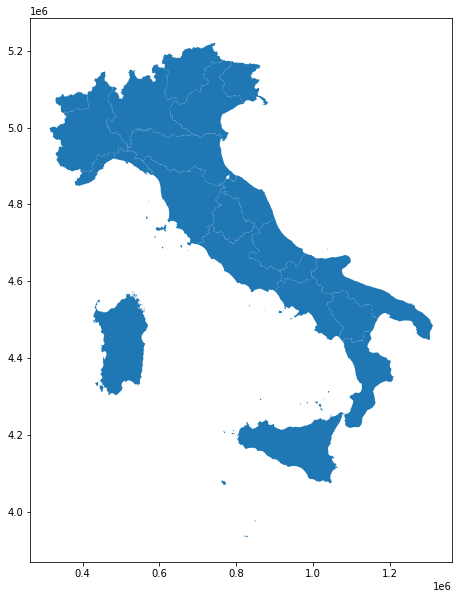

In [13]:
italy.plot(figsize=(10, 10))

In [14]:
italy['location'] = regions
italy

,COD_REG,location,SHAPE_Leng,SHAPE_Area,geometry
0,1,piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5..."
1,2,valled'aosta,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."
2,3,lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
3,4,trentino,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
4,5,veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5..."
5,6,friuli,6.674897e+05,7.864294e+09,"MULTIPOLYGON (((852211.994 5080672.916, 852270..."
6,7,liguria,8.342245e+05,5.415465e+09,"MULTIPOLYGON (((400403.625 4851436.938, 400257..."
7,8,emiliaromagna,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723..."
8,9,toscana,1.316658e+06,2.298443e+10,"MULTIPOLYGON (((593650.250 4867988.000, 593553..."
9,10,umbria,6.203152e+05,8.464008e+09,"MULTIPOLYGON (((771407.451 4833282.073, 771402..."


In [15]:
df_opinion

,location,pro,con,neutral
0,piemonte,33,112,79
1,valled'aosta,0,3,4
2,lombardia,48,242,233
3,trentino,1,28,22
4,veneto,24,98,92
5,friuli,24,42,23
6,liguria,3,26,23
7,emiliaromagna,19,112,75
8,toscana,61,261,192
9,umbria,2,27,14


In [16]:
#merge thw two dataframe
merge = italy.merge(df_opinion, on='location', how='right')
merge.head()

,COD_REG,location,SHAPE_Leng,SHAPE_Area,geometry,pro,con,neutral
0,1,piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",33,112,79
1,2,valled'aosta,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5...",0,3,4
2,3,lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",48,242,233
3,4,trentino,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5...",1,28,22
4,5,veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",24,98,92


In [17]:
#compute a ratio as (#pro-#con)/#tot
merge['ratio'] = (merge['pro']-merge['con']) / (merge['pro']+merge['con']+merge['neutral'])
merge.head()

,COD_REG,location,SHAPE_Leng,SHAPE_Area,geometry,pro,con,neutral,ratio
0,1,piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",33,112,79,-0.352679
1,2,valled'aosta,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5...",0,3,4,-0.428571
2,3,lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",48,242,233,-0.370937
3,4,trentino,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5...",1,28,22,-0.529412
4,5,veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",24,98,92,-0.345794


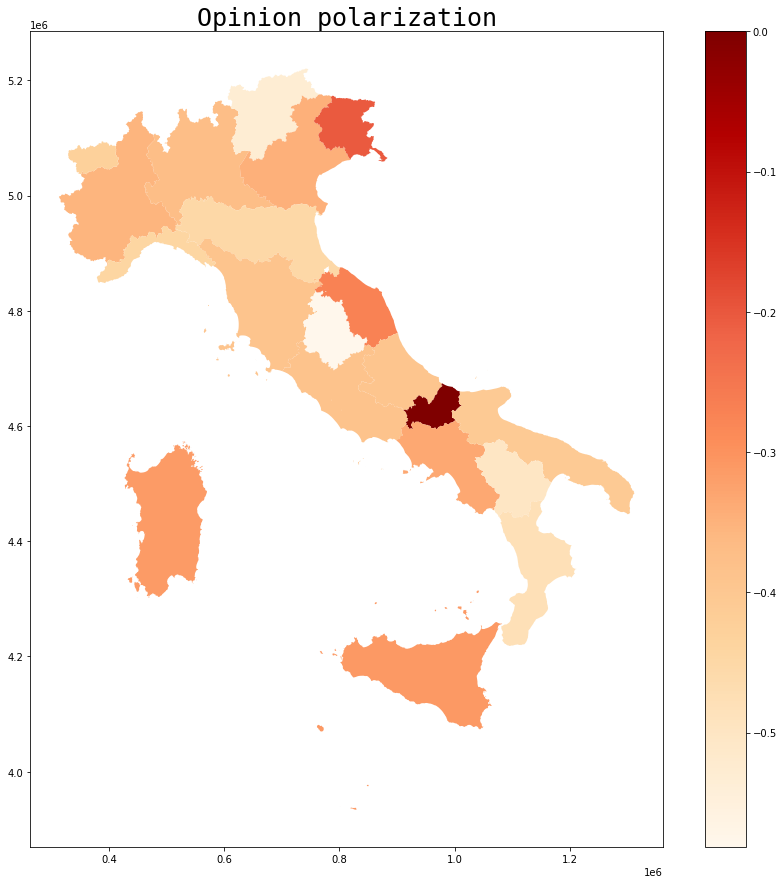

In [20]:
fig, ax = plt.subplots(1, figsize=(15, 15))
col = 'ratio'
ax.set_title('Opinion polarization', fontdict={'fontsize':'25', 'fontweight':'3'}, color='Black', fontfamily='monospace')
merge.plot(ax=ax, column=col, cmap='OrRd', label='ciao', legend=True, categorical=False)